### Q4

* a) training RSS will Steadily increase. As λ increases,the shrinkage of the esimated cofficients decreases even if it results in a bias, which usually happens, so this means that the RSS will increase because the bias increases as well

* b) test RSS will Decrease initially, and then eventually start increasing in a U shape. The goal of increasing  λ is to decrease the esimated cofficients values in order to make lower varience in compensation for increaseing the bias a little bit. This means at the begening the the varience will be lower and the test RSS will decrease, but if we keep increasing  λ to the point that the bias is very large, then it becomes a very simple model that have low accuracy prediction on any data, so the test RSS will start to increase after that point in a U shape. U shape means a quadratic function becasue the increase rate will jump at some point which makes that curve in the U shape.

* c) variance will Steadily increase. As λ increases, the model flexibility decreases. This means that varience deacreases as well since the model didn't capture all the details about the training data, and so will be more general and perfom better on testing data. If λ increased to be a positive infinity, then the model will become the null model which has a varience of zero since the result for any data is the same. In this case I guess the result is that "there is no result"??!

* d) (squared) bias will Steadily increase. same explanation in a) and c)

* e) the irreducible error will Remain constant. The irreducible doesn't depend on any of these esimated cofficients or the model at all, so it will remain constant.



## 8. In this exercise, we will generate simulated data, and will then use this data to perform best subset selection.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import itertools
from IPython.display import display, HTML
from sklearn import linear_model
from sklearn.model_selection import KFold
from ipywidgets import interact
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore')
from ipywidgets import interact
import ipywidgets as widgets
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from scipy import stats


#### (a) Use the rnorm() function to generate a predictor X of length n = 100, as well as a noise vector ε of length n = 100.

In [2]:
np.random.seed(1)
x   = np.random.normal(2.5, 1.5, 100)
eps = np.random.normal(2.5, 1.5, 100)

#### b) Generate a response vector Y of length n = 100 according to the model Y=β0+β1X+β2X2+β3X3+ε , where β0, β1, β2, and β3 are constants of your choice.

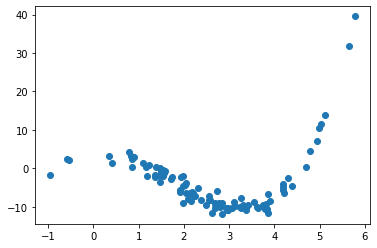

In [3]:
y_np = 2 + x + -5*(x**2) + (x**3) + eps
plt.scatter(x,y_np)

#### c) perform best subset selection in order to choose the best model containing the predictors X,X^2,...,X^10. What is the best model obtained according to Cp, BIC, and adjusted R2?

* this means we use the 100 x values that we generated to get values for each of x,...x^10 predictors. At the end we will have 10 predictors with 100 data points each.

##### Give credit
* I stole the following list of functions from an online source. 
* Since we shouldn't copy code without knowing what it does, so I decide to write notes on what I learned from the code and how it works. The following notes explains what I learned new about using statsmodels searborn

##### Notes
I am referring to the code with line numbers. Click on "view", then "show line numbers"

* line 12: X_smf = ' + '.join(X_label) -> join the predictor labels to make a pasty formula
* line 15 data=pd.concat([X, y]  ->
* ..........



In [4]:
def get_models(k, X, y):
    """
    Fit all possible models that contain exactly k predictors.
    """
    # List all available predictors
    X_combos = itertools.combinations(list(X.columns), k)
    
    # Fit all models accumulating Residual Sum of Squares (RSS)
    models = []
    for X_label in X_combos:
        # Parse patsy formula
        X_smf = ' + '.join(X_label)
        f     = '{} ~ {}'.format(y.columns[0], X_smf)
        # Fit model
        model = smf.ols(formula=f, data=pd.concat([X, y], axis=1)).fit()
        # Return results
        models += [(f, model)]
    return models


def min_rss(statsmodels):
    """Return model with lowest Residual Sum of Squares (RSS)"""
    return sorted(statsmodels, key=lambda tup: tup[1].ssr)[0]


def max_adjr2(statsmodels):
    """Return model with max R-squared"""
    return sorted(statsmodels, reverse=True, key=lambda tup: tup[1].rsquared_adj)[0]

def min_bic(statsmodels):
    """Return model with min Bayes' Information Criteria"""
    return sorted(statsmodels, reverse=False, key=lambda tup: tup[1].bic)[0]

def min_aic(statsmodels):
    """Return model with min Akaike's Information Criteria"""
    return sorted(statsmodels, reverse=False, key=lambda tup: tup[1].aic)[0]

In [5]:
X = pd.DataFrame({'X': x,'X2': x**2,'X3': x**3,'X4': x**4,'X5': x**5,'X6': x**6,'X7': x**7,'X8': x**8,'X9': x**9, 'X10': x**10})
y = pd.DataFrame({'y': y_np})
X.head()

,X,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,4.936518,24.369210,120.299047,593.858416,2931.592788,14471.860700,71440.601496,352667.818465,1.740951e+06,8.594236e+06
1,1.582365,2.503880,3.962053,6.269416,9.920507,15.697867,24.839761,39.305577,6.219578e+01,9.841646e+01
2,1.707742,2.916384,4.980433,8.505296,14.524854,24.804708,42.360051,72.340055,1.235382e+02,2.109714e+02
3,0.890547,0.793074,0.706270,0.628966,0.560124,0.498817,0.444220,0.395599,3.522994e-01,3.137392e-01
4,3.798111,14.425651,54.790228,208.099394,790.384688,3001.969129,11401.813303,43305.357587,1.644786e+05,6.247080e+05


In [6]:
# get all model results
model_subsets = []
for k in range(len(X.columns)):
    k=k+1
    subset = get_models(k, X, y)
    model_subsets += [subset]
    print('Progess: k = {}, done'.format(k))

Progess: k = 1, done
Progess: k = 2, done
Progess: k = 3, done
Progess: k = 4, done
Progess: k = 5, done
Progess: k = 6, done
Progess: k = 7, done
Progess: k = 8, done
Progess: k = 9, done
Progess: k = 10, done


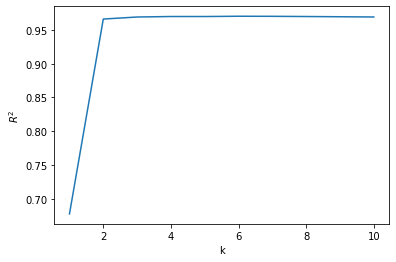

Model selected: 
Intercept    2.934887
X4          -3.336429
X5           2.499501
X6          -0.616572
X8           0.026320
X9          -0.004423
X10          0.000233
dtype: float64


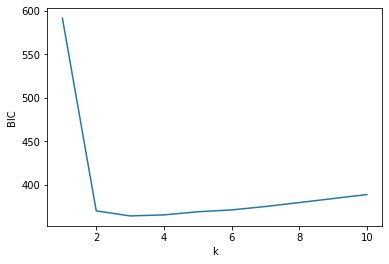

Model selected: 
Intercept    4.264885
X2          -3.783809
X3           0.691777
X5           0.004307
dtype: float64


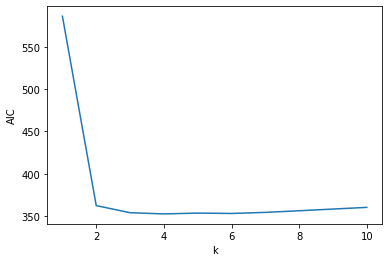

Model selected: 
Intercept    3.844696
X            0.973411
X2          -4.145133
X3           0.631159
X4           0.041292
dtype: float64


In [7]:
k = np.arange(1, len(X.columns)+1)

# adjr2
# Plot best r-squared score for each subset
adjr2 = [max_adjr2(m)[1].rsquared_adj for m in model_subsets]
sns.lineplot(x=k, y=adjr2)
plt.xlabel('k')
plt.ylabel('$R^2$')
plt.show()

# Select best subset
coefs_r2 = [(max_adjr2(m)[1].rsquared_adj, max_adjr2(m)[1].params) for m in model_subsets]
print('Model selected: \n{}'.format(max(coefs_r2)[1]))


# Bayes' Information Criteria (BIC)
# ------------------------------------------------
display(HTML('<h4>Bayes\' Information Criteria</h4>'))

# Get best BIC
bic = [min_bic(m)[1].bic for m in model_subsets]

sns.lineplot(x=k, y=bic)
plt.xlabel('k')
plt.ylabel('BIC')
plt.show()

# Select best subset
coefs_bic = [(min_bic(m)[1].bic, min_bic(m)[1].params) for m in model_subsets]
print('Model selected: \n{}'.format(min(coefs_bic)[1]))


# Akaike's Information Criteria (AIC/ C_p)
# ------------------------------------------------
display(HTML('<h4>Akaike\'s Information Criteria</h4>'))

# Get best AIC
aic = [min_aic(m)[1].aic for m in model_subsets]

sns.lineplot(x=k, y=aic)
plt.xlabel('k')
plt.ylabel('AIC')
plt.show()

# Select best subset
coefs_aic = [(min_aic(m)[1].aic, min_aic(m)[1].params) for m in model_subsets]
print('Model selected: \n{}'.format(min(coefs_aic)[1]))

#### Comment
* from the graphs it seems that models with 2 or more predictors in genreral are fine.
* Based on the printed  predictors's cofficient values, 
    - R^2 prefers 6 predictors
    - BIC prefers 3 predictors
    - AIC prefers 4 predictors

#### (d) Repeat (c), using forward stepwise selection and also using backwards stepwise selection. How does your answer compare to the results in (c)?

In [8]:
def forward_stepwise(X, y, scorer='ssr', results=[(0, [])]):
    """Perform forward stepwise variable selection as described in
    An Introductions to Statistical Learning (p.207)
    Returns pandas dataframe object  with results for each step"""
    # List predictors that havent's been used so far
    p_all    = list(X.columns)
    p_used   = results[-1][1]
    p_unused = [p for p in p_all if p not in p_used]
    
    # Job done, exit recursion
    if not p_unused:
        scores = [r[0] for r in results]
        preds  = [r[1] for r in results]
        return pd.DataFrame({scorer: scores, 'predictors': preds}).drop(0)
    
    # Get score for each possible additional predictor
    r = []
    for p in p_unused:
        f     = '{} ~ {}'.format(y.columns[0], '+'.join([p]+p_used))
        # Fit model
        model = smf.ols(formula=f, data=pd.concat([X, y], axis=1)).fit()
        r    += [(model, [p]+p_used)]
    
    # Choose predictor which yields best score
    if scorer == 'ssr':
        best_model = sorted(r, key=lambda tup: tup[0].ssr)[0]
        best_score = (best_model[0].ssr, best_model[1])
    elif scorer == 'rsquared_adj':
        best_model = sorted(r, key=lambda tup: tup[0].rsquared_adj)[-1]
        best_score = (best_model[0].rsquared_adj, best_model[1])        
    elif scorer == 'bic':
        best_model = sorted(r, key=lambda tup: tup[0].bic)[0]
        best_score = (best_model[0].bic, best_model[1]) 
    elif scorer == 'aic':
        best_model = sorted(r, key=lambda tup: tup[0].aic)[0]
        best_score = (best_model[0].aic, best_model[1]) 
                        
    new_results = results + [best_score]
    # Recursive call to self
    return forward_stepwise(X, y, scorer, new_results)

In [9]:
def backward_stepwise(X, y, scorer='ssr', results=[]):
    """Perform backward stepwise variable selection as described in
    An Introductions to Statistical Learning (p.209)
    Returns pandas dataframe object  with results for each step"""
    # List predictors that havent's been used so far
    p_all = list(X.columns)

    # Check if we're starting out here
    if not results:
        # Fit model with all features
        f     = '{} ~ {}'.format(y.columns[0], '+'.join(p_all))
        model = smf.ols(formula=f, data=pd.concat([X, y], axis=1)).fit()
        # Begin backward stepwise recursion
        if scorer == 'ssr':
            return backward_stepwise(X, y, scorer, [(model.ssr, p_all)])
        if scorer == 'rsquared_adj':
            return backward_stepwise(X, y, scorer, [(model.rsquared_adj, p_all)])
        if scorer == 'bic':
            return backward_stepwise(X, y, scorer, [(model.bic, p_all)])
        if scorer == 'aic':
            return backward_stepwise(X, y, scorer, [(model.aic, p_all)])
    else:
        p_used = results[-1][1]
    
    # Job done, exit recursion
    if len(p_used) == 1:
        scores = [r[0] for r in results]
        preds  = [r[1] for r in results]
        return pd.DataFrame({scorer: scores, 'predictors': preds})    
    
    # Get rss score for each possible removed predictor
    r = []
    for p in p_used:
        p_test = [i for i in p_used if i != p]
        f     = '{} ~ {}'.format(y.columns[0], '+'.join(p_test))
        # Fit model
        model = smf.ols(formula=f, data=pd.concat([X, y], axis=1)).fit()
        r     += [(model, p_test)]
    
    # Choose removal of predictor which yields best score
    if scorer == 'ssr':
        best_model = sorted(r, key=lambda tup: tup[0].ssr)[0]
        best_score = (best_model[0].ssr, best_model[1])
    elif scorer == 'rsquared_adj':
        best_model = sorted(r, key=lambda tup: tup[0].rsquared_adj)[-1]
        best_score = (best_model[0].rsquared_adj, best_model[1])        
    elif scorer == 'bic':
        best_model = sorted(r, key=lambda tup: tup[0].bic)[0]
        best_score = (best_model[0].bic, best_model[1]) 
    elif scorer == 'aic':
        best_model = sorted(r, key=lambda tup: tup[0].aic)[0]
        best_score = (best_model[0].aic, best_model[1]) 

    new_results = results + [best_score]
    # Recursive call to self
    return backward_stepwise(X, y, scorer, new_results)


def subset_analysis(df, scorer):
    """Renders results from forward_stepwise() and backward_stepwise()"""
    df['predictors_str'] = df['predictors'].astype(str)
    
    ax = sns.lineplot(x='predictors_str', y=scorer, data=df, sort=False)
    plt.xticks(rotation=90)
    plt.show();
    
    if scorer == 'rsquared_adj':
        display(df[df[scorer] ==  df[scorer].max()].drop('predictors_str', axis=1))
    else:
        display(df[df[scorer] ==  df[scorer].min()].drop('predictors_str', axis=1))

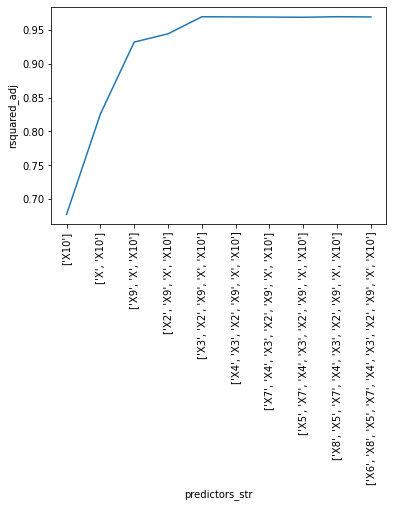

,rsquared_adj,predictors
9,0.969479,"[X8, X5, X7, X4, X3, X2, X9, X, X10]"


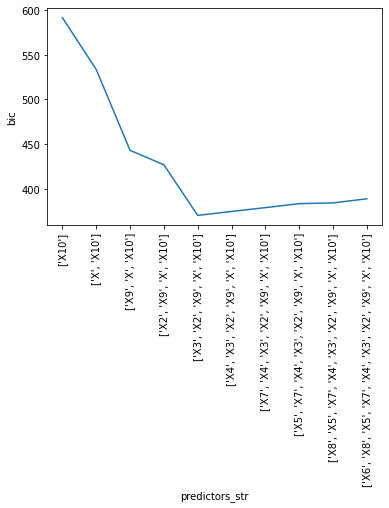

,bic,predictors
5,370.178625,"[X3, X2, X9, X, X10]"


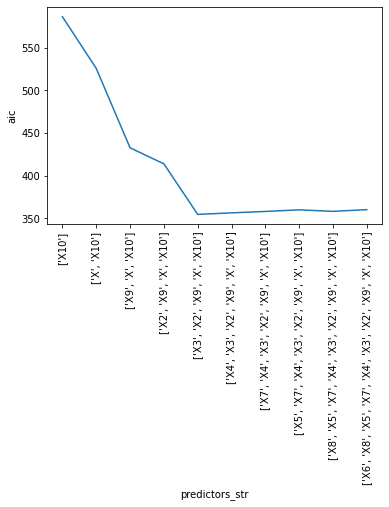

,aic,predictors
5,354.547604,"[X3, X2, X9, X, X10]"


In [10]:
# Forward stepwise selection


# adjr2
# ------------------------------------------------
display(HTML('<h4>Adjusted R^2</h4>'))
scorer = 'rsquared_adj'
subset_analysis(forward_stepwise(X, y, scorer=scorer), scorer)

# Bayes' Information Criteria (BIC)
# ------------------------------------------------
display(HTML('<h4>Bayes\' Information Criteria</h4>'))
scorer = 'bic'
subset_analysis(forward_stepwise(X, y, scorer=scorer), scorer)

# Akaike's Information Criteria (AIC/ C_p)
# ------------------------------------------------
display(HTML('<h4>Akaike\'s Information Criteria</h4>'))
scorer = 'aic'
subset_analysis(forward_stepwise(X, y, scorer=scorer), scorer)

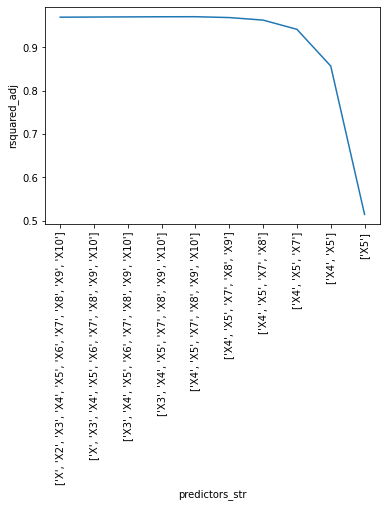

,rsquared_adj,predictors
4,0.97023,"[X4, X5, X7, X8, X9, X10]"


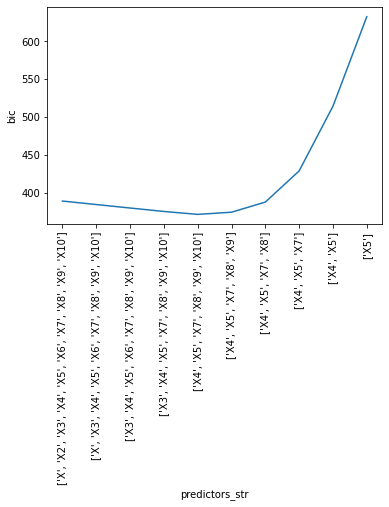

,bic,predictors
4,371.121433,"[X4, X5, X7, X8, X9, X10]"


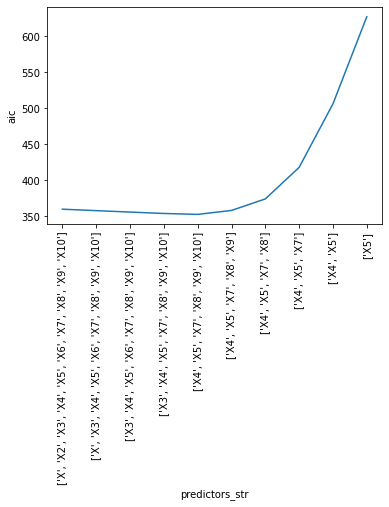

,aic,predictors
4,352.885242,"[X4, X5, X7, X8, X9, X10]"


In [11]:
# Backward stepwise selection


# adjr2
# ------------------------------------------------
display(HTML('<h4>Adjusted R^2</h4>'))
scorer = 'rsquared_adj'
subset_analysis(backward_stepwise(X, y, scorer=scorer), scorer)

# Bayes' Information Criteria (BIC)
# ------------------------------------------------
display(HTML('<h4>Bayes\' Information Criteria</h4>'))
scorer = 'bic'
subset_analysis(backward_stepwise(X, y, scorer=scorer), scorer)

# Akaike's Information Criteria (AIC/ C_p)
# ------------------------------------------------
display(HTML('<h4>Akaike\'s Information Criteria</h4>'))
scorer = 'aic'
subset_analysis(backward_stepwise(X, y, scorer=scorer), scorer)

## Comment
#### Forward
* R^2 prefered 9 predictors [X8, X5, X7, X4, X3, X2, X9, X, X10 ] 
* BIC prefered 5 predictors [X3, X2, X9, X, X10]
* AIC prefered 5 predictors [X3, X2, X9, X, X10]

#### Backward
* R^2 prefered 6 predictors [X4, X5, X7, X8, X9, X10]
* BIC prefered 6 predictors [X4, X5, X7, X8, X9, X10]
* AIC prefered 6 predictors [X4, X5, X7, X8, X9, X10]

##### Observations
 - The commonpredictors between all of them are X9 and X10
 - Backward stepwise selection chooses the same models as best susbset selection for all metrics.
 - I didn't expect R^2 to be that different in the Forward stepwise selection ?! Also I thought Forward stepwise selection continou to add predictors untill no improvements in R^2, so I thought it will be less than that?!
 - Backward chooses more complex models, 6 predictors, than Forward, 5 predictors because Forward stops when there is no more    improvements in R^2
 
##### Compare the results with what I got in C) 

- R^2 
   - Best subset = 6  , Forward = 9, Backward= 6
- BIC 
    - Best subset = 3  , Forward = 5, Backward= 6
- AIC 
    - Best subset = 4  , Forward = 5, Backward= 6
- Backward is the same number of predictors across all of them

#### (e) Now fit a lasso model to the simulated data, again using X,X2, . . . , X 10 as predictors. Use cross-validation to select the optimal value of λ. Create plots of the cross-validation error as a function of λ. Report the resulting coefficient estimates, and discuss the results obtained

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

X_stand = X / X.std()
X_train, X_test, y_train, y_test = train_test_split(X_stand, y)



alphas = np.linspace(.0001, .1, 1000)
errors = []
for alpha in alphas:
    ls = Lasso(alpha, max_iter=100000, tol=.0001)
    ls.fit(X_train, y_train)
    errors.append(np.mean((ls.predict(X_test).reshape(-1,1) - y_test) ** 2))

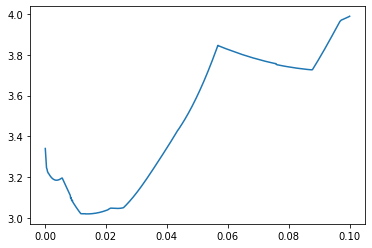

In [24]:
plt.plot(alphas, errors)

In [54]:
print(np.argmin(errors))
alphas[999]

999


0.1

In [56]:
ls = Lasso(alpha=0.1, max_iter=100000, tol=.0001)
ls.fit(X_stand, y)

Lasso(alpha=0.1, max_iter=100000)

In [57]:
ls.intercept_, ls.coef_

(9.31625557032811,
 array([ 0.7320789 , -0.34985748, -0.130057  , -0.43001406,  0.01828142,
         0.        , -1.26296731,  4.30679517, -0.        , -0.23119986,
        -0.69102792,  0.84083062, -1.15408541]))

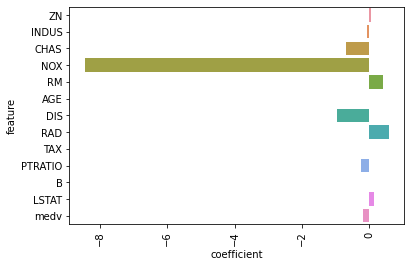

,feature,coefficient
0,ZN,0.044915
1,INDUS,-0.072046
2,CHAS,-0.685743
3,NOX,-8.453167
4,RM,0.407588
5,AGE,-0.000000
6,DIS,-0.950857
7,RAD,0.582452
8,TAX,-0.003808
9,PTRATIO,-0.244361


In [58]:
lamb = alphas[53]
model = linear_model.Lasso(alpha=lamb, fit_intercept=True, normalize=False, max_iter=1000000).fit(X, y)
df = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})
# plot
ax = sns.barplot(x='coefficient', y='feature', data=df);
plt.xticks(rotation=90)
plt.show();
display(df)

##### Comment 

- The Lasso selected all parameters except " AGE " = -0.000000. I don't understand how the zero is negative though?!
- The chart indicates that it gives a high value to the "NOX" predictor = -8.453167

#### 11. We will now try to predict per capita crime rate in the Boston data set.

* This means Y = CRIM - per capita crime rate by town

In [32]:
import statsmodels.api as sm
from sklearn import datasets

boston = datasets.load_boston()
boston_feat = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_resp = pd.Series(boston.target).rename('medv')
boston_df = pd.concat([boston_feat, boston_resp], axis=1)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### (a) Try out some of the regression methods explored in this chapter , lasso, ridge regression, and PCR

--
## Lasso

--

Text(0, 0.5, 'weights')

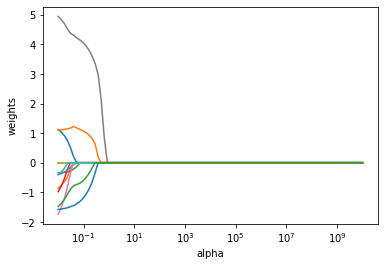

In [100]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

#### Comment
* In the coefficient plot some of the coefficients are exactly equal to zero unlike the ridge regression. 
* We now perform 10-fold cross-validation to choose the best alpha, refit the model, and compute the associated test error:

In [108]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

print("best alpha =", lassocv.alpha_)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

best alpha = 0.0013400253054871242


40.02146811941446

In [109]:
lasso.fit(X, y)
pd.Series(lasso.coef_, index = X.columns)

ZN         0.039423
INDUS     -0.070640
CHAS      -0.641737
NOX       -8.328115
RM         0.315744
AGE        0.000000
DIS       -0.872736
RAD        0.539005
TAX       -0.001148
PTRATIO   -0.222389
B         -0.007535
LSTAT      0.126502
medv      -0.174263
dtype: float64

#### Comment
* I expected to see zero cofficients for some of the predictors . 
* Yaaaaay! it's only one of the predictors that has exactly zero cofficient, "AGE" = 0.000000
* I thoght I will see more predictors with zero cofficients

--
### Ridge Regression using CV
--

In [102]:
from sklearn.linear_model import RidgeCV

alphas = 10**np.linspace(10,-2,100)*0.5
rcv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', cv=10, normalize = True)
rcv.fit(X , y)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [103]:

rcv.score(X, y)

0.43609681823907176

In [104]:
rcv.alpha_

0.18824679033962358

The value of alpha that results in the smallest cross-validation error is 0.188

In [105]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

ridge2 = Ridge(alpha = rcv.alpha_, normalize = True)
ridge2.fit(X_train, y_train)
mean_squared_error(y_test, ridge2.predict(X_test))

38.22830031742955

we refit our ridge regression model on the full data set, using the value of alpha chosen by cross-validation, and examine the coefficient estimates.

In [106]:
ridge2.fit(X, y)
pd.Series(ridge2.coef_, index = X.columns)

ZN         0.024534
INDUS     -0.054005
CHAS      -0.773233
NOX       -1.551472
RM         0.213654
AGE        0.003996
DIS       -0.462669
RAD        0.317051
TAX        0.006174
PTRATIO   -0.025731
B         -0.008968
LSTAT      0.134814
medv      -0.099776
dtype: float64

##### Comment
* None of the coefficients are exactly zero. They are all very small fractions except "NOX" has a value of -1.55
* This means that Ridge regression can reduce the effect of predictors, but will never acually reduce their number, so it doesn't do predictors selection.

#### PCR

In [67]:

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

In [68]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

In [70]:
# the first few variables of the first few principal components:
pd.DataFrame(pca.components_.T).loc[:4,:5]

,0,1,2,3,4,5
0,0.260386,-0.122323,-0.386785,0.372729,-0.118917,-0.415687
1,-0.344970,0.117053,0.016065,0.006170,0.021738,-0.146176
2,0.002537,0.405377,0.202386,0.691014,0.529947,0.167557
3,-0.337133,0.246515,0.024281,0.059282,-0.195468,-0.191067
4,0.212422,0.455011,-0.339539,-0.271294,0.009667,0.134558


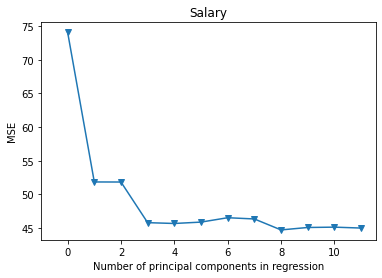

In [111]:
n = len(X_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 12 principle components.
for i in np.arange(1, 12):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

#### Comment
*  We have 13 predictors and M should be less than P
* Since this is PCR then M must be less than P, so this why I tried using CV up to 12 M, principle components.
* From the graph, it seems that 8 principle components has the least MSE ??!!! 


In [114]:
# the amount of variance explained by adding each consecutive principal component
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 47.7 ,  60.36,  69.67,  76.45,  83.  ,  88.  ,  91.14,  93.45,
        95.4 ,  97.05,  98.47,  99.53, 100.01])

#### Comment
* The previous array values indicate the percentage of variations that were captured by each M. It seems that M> 8 is better, but I will go with 8 since it has low MSE and 95.4% of variation

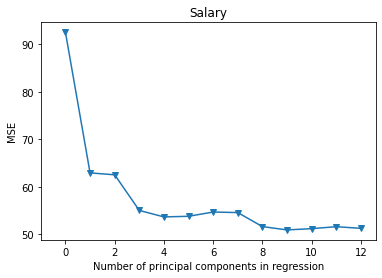

In [116]:
#  perform PCA on the training data and evaluate its test set performance

pca2 = PCA()

# Split into training and test sets
X_train, X_test , y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=1)

# Scale the data
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 12 principle components.
for i in np.arange(1, 13):
    score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

In [119]:
#  perform on the test data and compute the test MSE using M = 8


X_reduced_test = pca2.transform(scale(X_test))[:,:9]

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:9], y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

43.69245533192961

#### Comment

* MSE for Ridge =  38.22830031742955
* MSE for Lasso =  40.02146811941446
* MSE for PCR   =  43.69245533192961

#### (b) Propose a model (or set of models) that seem to perform well on this data set, and justify your answer. Make sure that you are evaluating model performance using  cross- validation

In [121]:
import pandas as pd
import numpy as np
import sklearn.linear_model as skl_lm
import matplotlib.pyplot as plt

In [125]:
# perform CV to compare models

# PCR
crossvalidation = KFold(n_splits=10, random_state=1, shuffle=True)
model = regr.fit(X, y)
scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=crossvalidation,n_jobs=1)
print("  MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

  MSE: 43.530083988260614, STD: 42.44715176933458


In [126]:
# Ridge Regression
crossvalidation = KFold(n_splits=10, random_state=1, shuffle=True)
model = ridge2.fit(X, y)
scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=crossvalidation,n_jobs=1)
print("  MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

  MSE: 43.99054857999124, STD: 44.0558686724459


In [127]:
# Lasso
crossvalidation = KFold(n_splits=10, random_state=1, shuffle=True)
model = lasso.fit(X, y)
scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=crossvalidation,n_jobs=1)
print("  MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

  MSE: 43.36752697796702, STD: 42.622771232187304


#### Comment
CV MSE
* MSE for Lasso =  43.36752697796702
* MSE for PCR   =  43.530083988260614
* MSE for Ridge =  43.99054857999124

- I didn't expect the results to be that close?!
- I will choose Lasso because it has lowest MSE for the CV and second lowest MSE in general 40.02146811941446

#### (c) Does your chosen model involve all of the features in the data set? Why or why not?

No. It includes all the predictors wxcept one, the "AGE"  because it has a cofficient of Zero
